BDS^3
=====

## Вступ до аналізу біологічних зобраржень на Python
---

- Завантаження зображень
- Структура зображень в Python, масиви
- Відображення картинок matplotlib та кольорові маски
- Гістограма зображення
- Логічна індексація зображень та маски
- Пошук оптимального порогу для побудови маски
- Фільтрація маски, морфологічні оператори
- Сегментація маски та отримання лейблів окремих об'єктів на зображенні

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

### Завантаження зображень

In [2]:
image = skimage.io.imread('data/cell_image.tif')

In [3]:
image.shape

(256, 256)

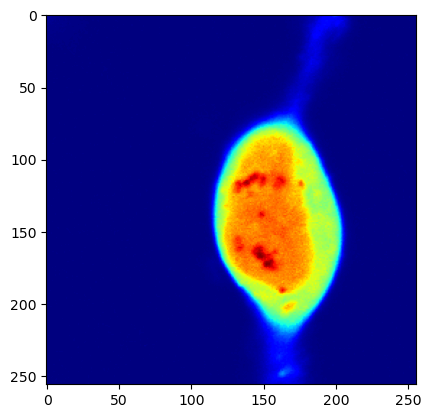

In [4]:
plt.imshow(image, cmap='jet')

In [5]:
image.max()

3494

In [6]:
demo_arr = np.asarray([0, 1, 4, 6, 2])
demo_arr

array([0, 1, 4, 6, 2])

In [7]:
demo_list = [0, 1, 4, 6, 2]
demo_list

[0, 1, 4, 6, 2]

In [8]:
demo_list[2] > 1

True

In [9]:
demo_arr > 1

array([False, False,  True,  True,  True])

### Побудова масок

In [10]:
simple_mask = image > 500

In [11]:
print(simple_mask.shape)
print(image.shape)

(256, 256)
(256, 256)


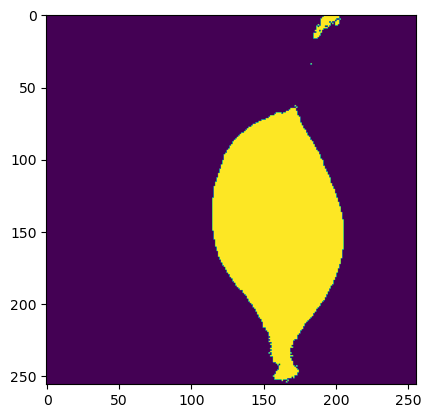

In [12]:
plt.imshow(simple_mask)

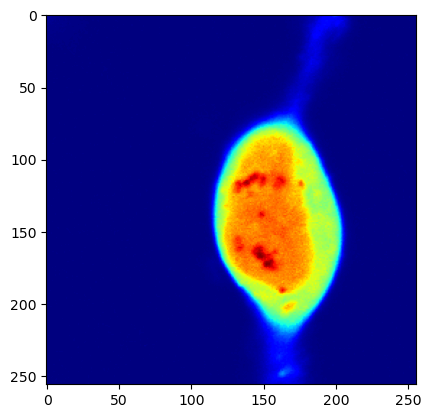

In [13]:
plt.imshow(image, cmap='jet')

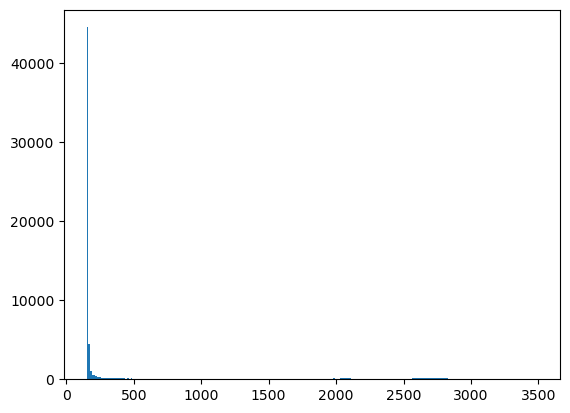

In [14]:
plt.hist(image.ravel(), bins=256)
plt.show()

In [15]:
th_otsu = skimage.filters.threshold_otsu(image)
th_otsu

1277

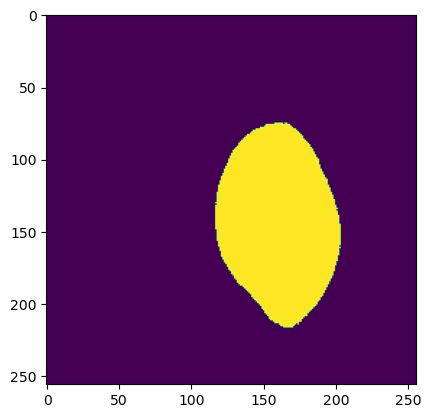

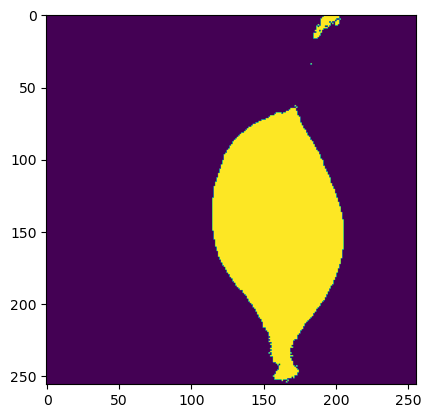

In [16]:
otsu_mask = image > th_otsu
plt.imshow(otsu_mask)
plt.show()

plt.imshow(simple_mask)
plt.show()

In [17]:
multi_otsu_th = skimage.filters.threshold_multiotsu(image)
multi_otsu_th

array([1012, 2264])

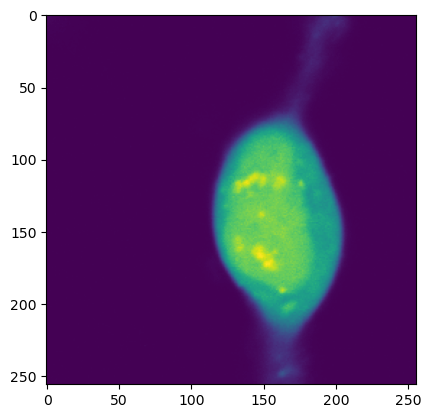

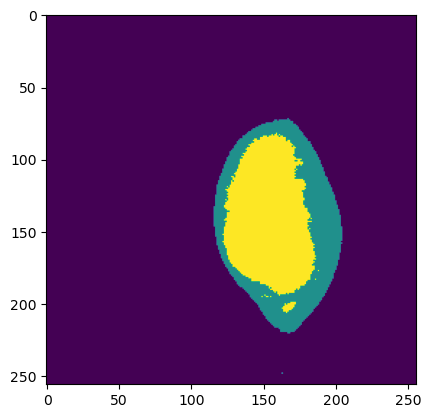

In [18]:
cell_segments = np.digitize(image, bins=multi_otsu_th)

plt.imshow(image)
plt.show()
plt.imshow(cell_segments)
plt.show()

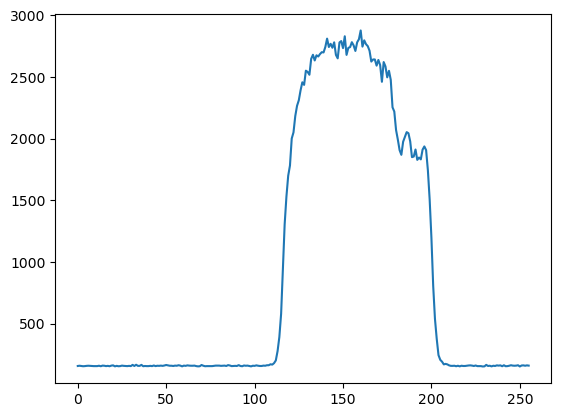

In [19]:
plt.plot(image[130, :])

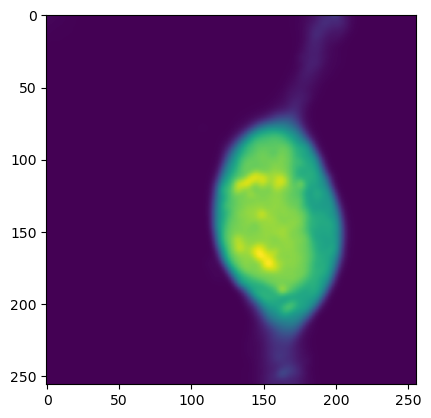

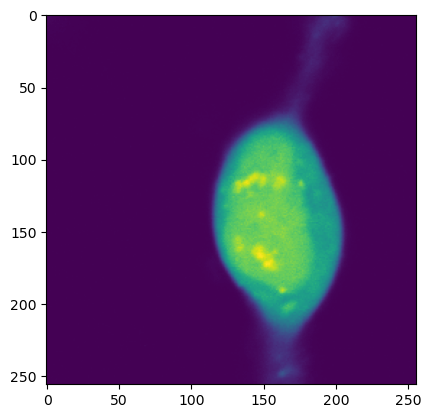

In [20]:
image_filtered = skimage.filters.gaussian(image, sigma=2)

plt.imshow(image_filtered)
plt.show()

plt.imshow(image)
plt.show()

### Морфологічні оператори

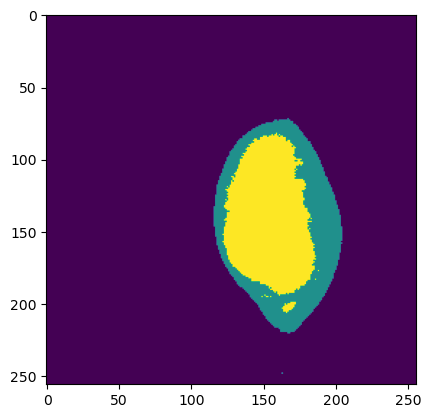

In [21]:
plt.imshow(cell_segments)
plt.show()

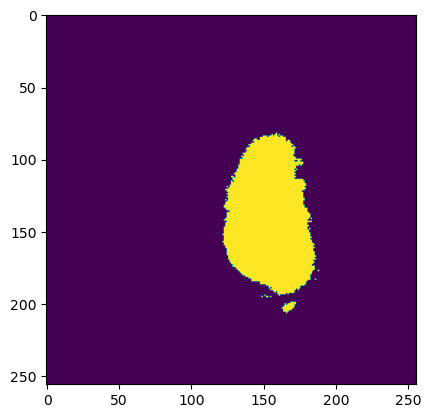

In [37]:
nucl_mask = ~(cell_segments < 2)

plt.imshow(nucl_mask)
plt.show()

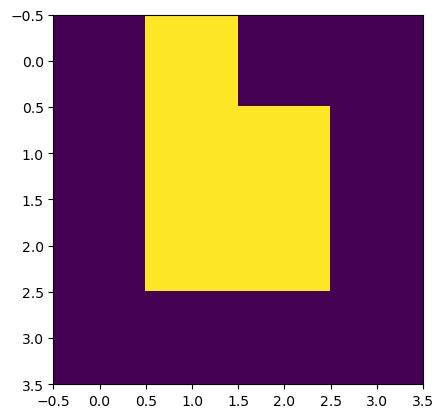

In [24]:
demo_arr = [[0, 1, 0, 0],
            [0, 1, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 0, 0]]

plt.imshow(demo_arr)

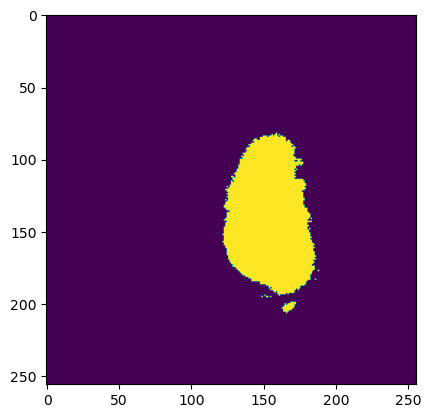

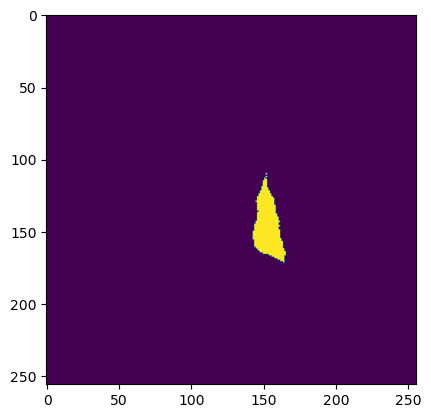

In [44]:
foot = [[1,1,1],
        [1,1,1],
        [1,1,1]]
disk_foot = skimage.morphology.disk(20)
nucl_erosion = skimage.morphology.erosion(nucl_mask, footprint=disk_foot)

plt.imshow(nucl_mask)
plt.show()

plt.imshow(nucl_erosion)
plt.show()

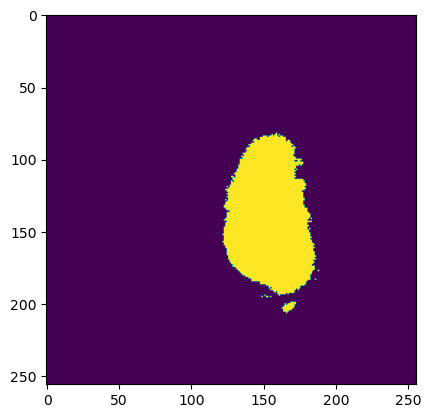

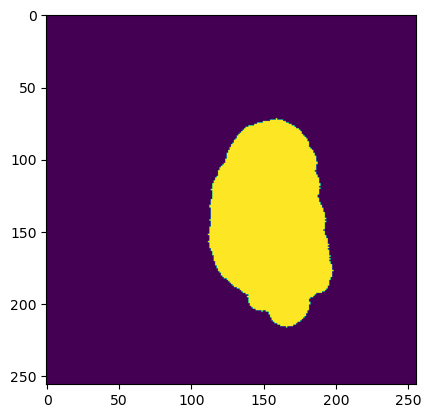

In [45]:
disk_foot_d = skimage.morphology.disk(10)
nucl_dilation = skimage.morphology.dilation(nucl_mask, footprint=disk_foot_d)

plt.imshow(nucl_mask)
plt.show()

plt.imshow(nucl_dilation)
plt.show()

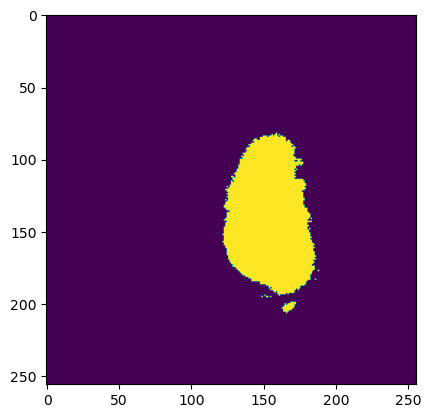

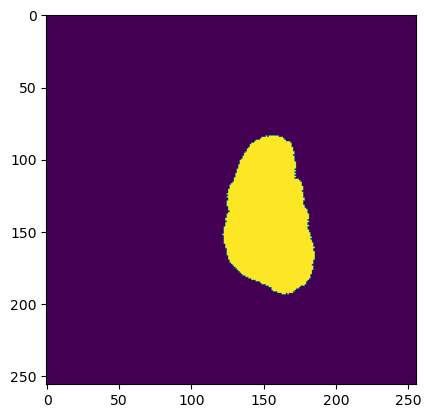

In [52]:
foot_e_d = skimage.morphology.disk(5)

eroded_mask = skimage.morphology.erosion(nucl_mask, footprint=foot_e_d)
fin_mask = skimage.morphology.dilation(eroded_mask, footprint=foot_e_d) 

plt.imshow(nucl_mask)
plt.show()

plt.imshow(fin_mask)
plt.show()

In [53]:
img_demo = skimage.data.human_mitosis()

mask = img_demo > skimage.filters.threshold_otsu(img_demo)
label = skimage.morphology.label(mask)

plt.imshow(img_demo)
plt.show()

plt.imshow(label)
plt.show()

Failed to download 'mitosis.tif'. Will attempt the download again 3 more times.
Failed to download 'mitosis.tif'. Will attempt the download again 2 more times.
Failed to download 'mitosis.tif'. Will attempt the download again 1 more time.


ConnectionError: HTTPSConnectionPool(host='gitlab.com', port=443): Max retries exceeded with url: /scikit-image/data/-/raw/master/AS_09125_050116030001_D03f00d0.tif (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fa994284670>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))